#     DESAFÍO COMPLEMENTARIO: Algoritmo de clasificación

In [1]:
#Importamos las librerias que vamos a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import urllib.request
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier



In [2]:
# Importamos y visualizamos el dataset, seleccionando las columnas que utilizaremos
db = pd.read_csv("heart_2020_cleaned.csv")
db["HeartDisease"] = db["HeartDisease"].replace({"No": 0, "Yes": 1})
db["Sex"] = db["Sex"].replace({"Male": 0, "Female": 1})
db["Smoking"] = db["Smoking"].replace({"No": 0, "Yes": 1})
db["AlcoholDrinking"] = db["AlcoholDrinking"].replace({"No": 0, "Yes": 1})

In [3]:
db 

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,No,3.0,30.0,No,1,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,0,20.34,0,0,Yes,0.0,0.0,No,1,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,0,26.58,1,0,No,20.0,30.0,No,0,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,0,24.21,0,0,No,0.0,0.0,No,1,75-79,White,No,No,Good,6.0,No,No,Yes
4,0,23.71,0,0,No,28.0,0.0,Yes,1,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,No,7.0,0.0,Yes,0,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,0,29.84,1,0,No,0.0,0.0,No,0,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,0,24.24,0,0,No,0.0,0.0,No,1,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,0,32.81,0,0,No,0.0,0.0,No,1,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [4]:
db.describe(include="all")

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,319795.000000,319795.000000,319795.000000,319795.000000,319795,319795.00000,319795.000000,319795,319795.000000,319795,319795,319795,319795,319795,319795.000000,319795,319795,319795
unique,NaN,NaN,NaN,NaN,2,NaN,NaN,2,NaN,13,6,4,2,5,NaN,2,2,2
top,NaN,NaN,NaN,NaN,No,NaN,NaN,No,NaN,65-69,White,No,Yes,Very good,NaN,No,No,No
freq,NaN,NaN,NaN,NaN,307726,NaN,NaN,275385,NaN,34151,245212,269653,247957,113858,NaN,276923,308016,289976
mean,0.085595,28.325399,0.412477,0.068097,NaN,3.37171,3.898366,NaN,0.524727,NaN,NaN,NaN,NaN,NaN,7.097075,NaN,NaN,NaN
std,0.279766,6.356100,0.492281,0.251912,NaN,7.95085,7.955235,NaN,0.499389,NaN,NaN,NaN,NaN,NaN,1.436007,NaN,NaN,NaN
min,0.000000,12.020000,0.000000,0.000000,NaN,0.00000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,0.000000,24.030000,0.000000,0.000000,NaN,0.00000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN
50%,0.000000,27.340000,0.000000,0.000000,NaN,0.00000,0.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN
75%,0.000000,31.420000,1.000000,0.000000,NaN,2.00000,3.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN


In [5]:
db.dtypes

HeartDisease          int64
BMI                 float64
Smoking               int64
AlcoholDrinking       int64
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                   int64
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [7]:
# Creamos un nuevo dataframe solo con las variables a usar::
db_arbol = db[["AgeCategory", "Sex", "Smoking", "AlcoholDrinking", "HeartDisease"]].copy()
db_arbol.head()

,AgeCategory,Sex,Smoking,AlcoholDrinking,HeartDisease
0,55-59,1,1,0,0
1,80 or older,1,0,0,0
2,65-69,0,1,0,0
3,75-79,1,0,0,0
4,40-44,1,0,0,0


In [8]:
db_arbol["AgeCategory"] = db_arbol["AgeCategory"].replace({"18-24": 0, "25-29": 1, "30-34": 2, 
                                               "35-39": 3, "40-44": 4, "45-49": 5, 
                                               "50-54": 6, "55-59": 7, "60-64": 8, 
                                               "65-69": 9, "70-74": 10, "75-79": 11, 
                                               "80 or older": 12})
db_arbol.head()

,AgeCategory,Sex,Smoking,AlcoholDrinking,HeartDisease
0,7,1,1,0,0
1,12,1,0,0,0
2,9,0,1,0,0
3,11,1,0,0,0
4,4,1,0,0,0


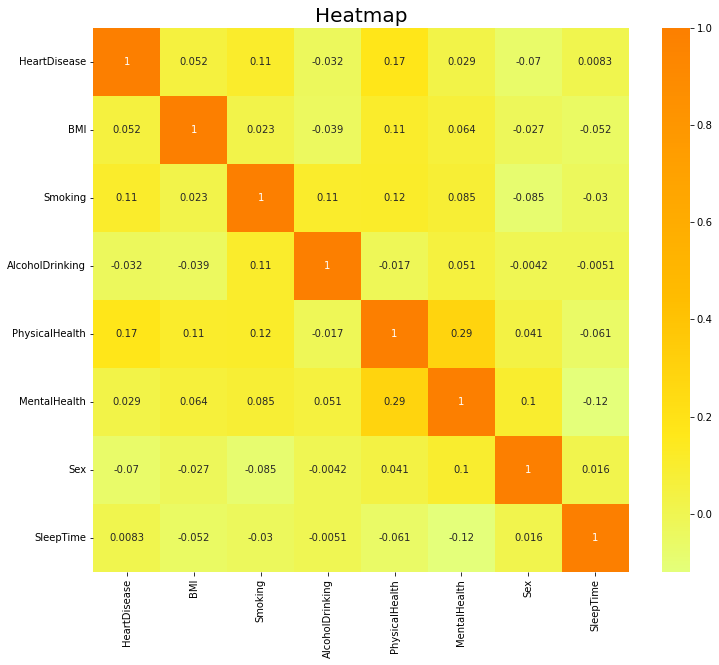

In [20]:
plt.figure(figsize=(12,10))
sns.heatmap(db.corr(), annot = True, cmap = 'Wistia')
plt.title('Heatmap', fontsize = 20)
plt.show()

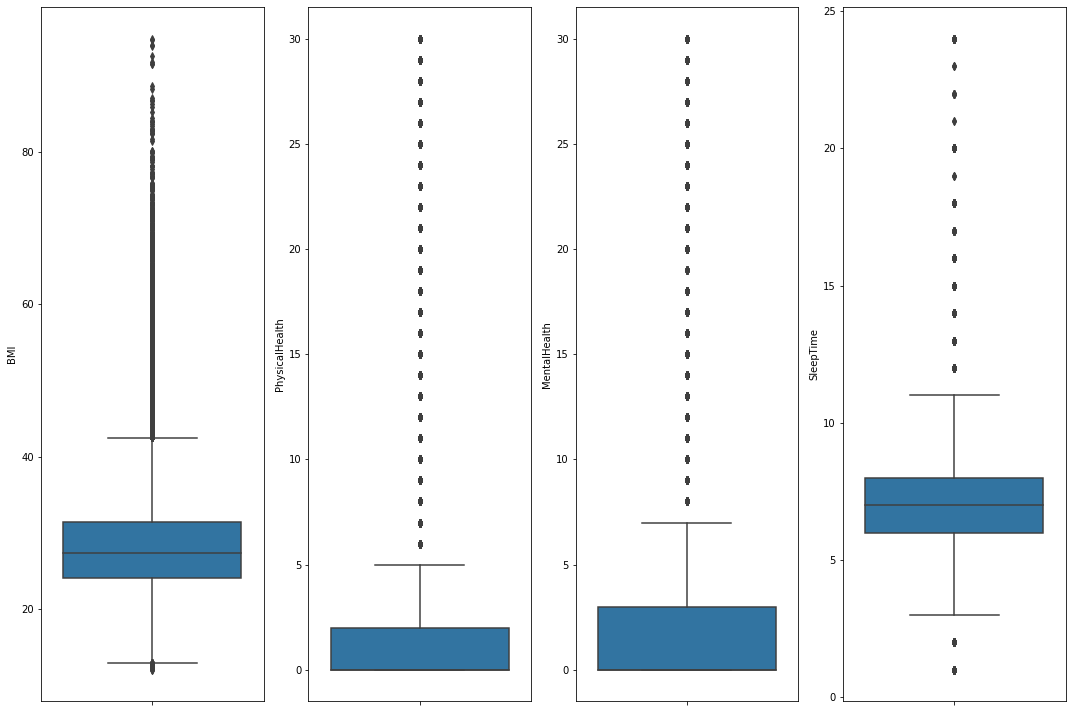

In [21]:
variables = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

fig, axes = plt.subplots(1, len(variables), figsize=(15,10))

for ax, variable in zip(axes, variables):
    ax = sns.boxplot( y=variable, data=db, ax=ax)
plt.tight_layout()

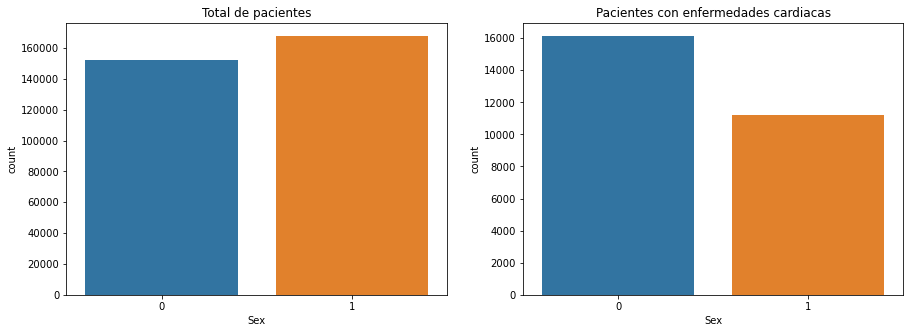

In [23]:
fig, ax =plt.subplots(1,2, figsize=(15,5))

sns.countplot(data = db, x = db["Sex"], ax=ax[0])
ax[0].set(title='Total de pacientes')

sns.countplot(data = db, x = db["Sex"][db["HeartDisease"] == 1], ax=ax[1])
ax[1].set(title='Pacientes con enfermedades cardiacas')

plt.show()

# Creación del modelo

In [9]:
from sklearn.model_selection import train_test_split #Importamos la libreria para separar en train y test

In [10]:
#Separamos los datos de entrada de la salida
X = db_arbol.drop('HeartDisease', axis = 1) #Elimino de mi dataset la variable a predecir
y = db_arbol.HeartDisease #Defino el Target

In [11]:
# Separación de la data en 70% y 30%:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 

In [12]:
from sklearn.tree import DecisionTreeClassifier #Importamos el modelo
# Creación y entrenamiento del modelo:
arbol_de_decision = DecisionTreeClassifier(max_depth=3, random_state = 25)
arbol_de_decision.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=25)

In [13]:
y_train_pred = arbol_de_decision.predict(X_train) #Prediccion en Train
y_test_pred = arbol_de_decision.predict(X_test) #Prediccion en Test

In [14]:

train_accuracy = accuracy_score(y_train, y_train_pred)

test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de entrenamiento: 0.9147532342219998
% de aciertos sobre el set de evaluación: 0.9135909275685592


In [15]:
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.9135909275685592


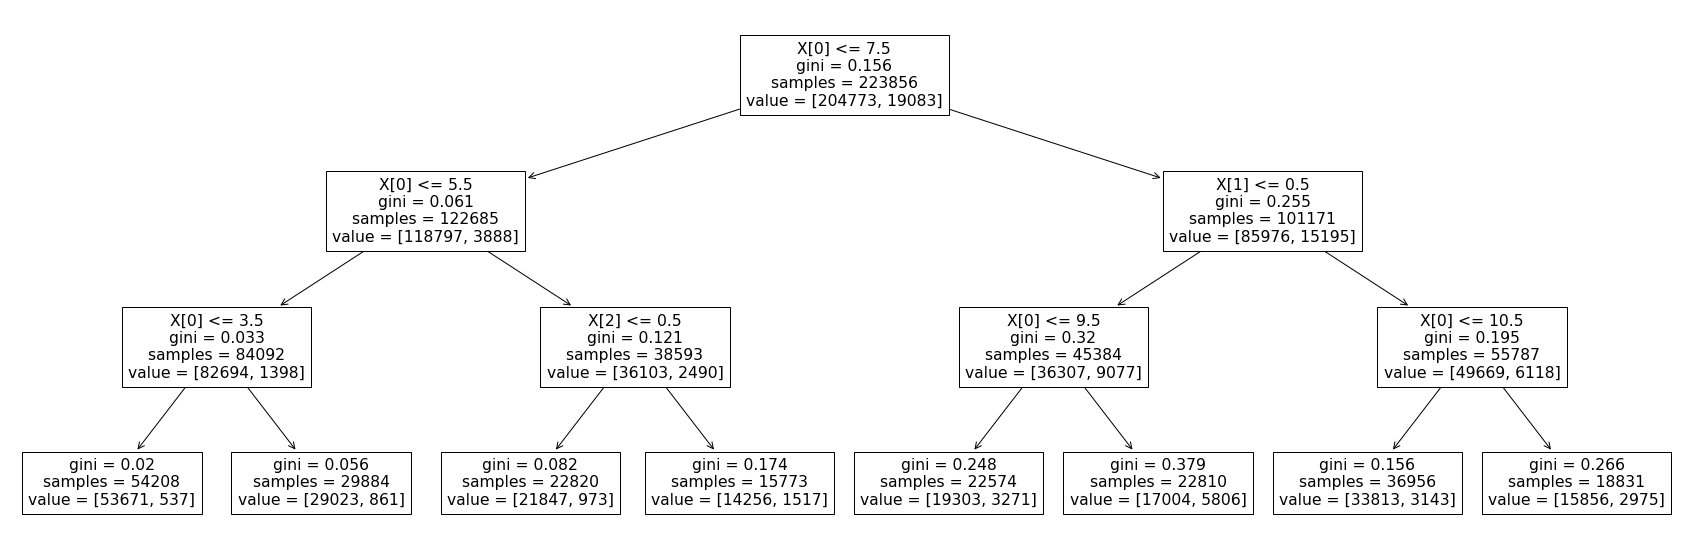

In [16]:
from sklearn import tree
plt.figure(figsize=(30,10))
tree.plot_tree(arbol_de_decision)

plt.show()

# RANDOM FOREST

In [17]:
#Creamos un random forest!
model = RandomForestClassifier(random_state=11, n_estimators=50,
                               class_weight="balanced", max_features="log2")
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_features='log2',
                       n_estimators=50, random_state=11)

In [18]:
y_test_pred = model.predict(X_test) #Prediccion en Test

In [19]:
#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.6462335442312303
